# MusicAI
## Sztuczna Inteligencja - projekt 
### Część 1 - przetwarzanie dźwięku (przygotowanie danych)
Autorzy: Jakub Ochnik, Adam Karabiniewicz, Marcel Bieniek
___


# Part 1: data (audio) preprocessing

## Theory

### Sound
- essentially vibrations
- represented by waveform (amplitude & time)
### Waveform
- T = period between two peaks (okres drgań)
- frequency: f = 1/T, The lower the period, the higher the frequency
- amplitude = max distance from y=0 to the peak
- waveform function: y(t) = A*sin(2*pi*f*t + fi), fi = phase - it shifts the waveform to the right or to the left
### Pitch and loudness
- Higher frequency -> higher pitch (ton)
- Longer periods -> Lower pitch, shorter periods -> higher pitch
- Larger amplitude -> louder (głośność)
### Digitalization
- Acoustic sound waves (piano, voice) are continous, analog waveforms
- We need them in a digital form
- Analog digital conversion (ADC)
- Sampling (sampling at a specific time intervals) -> Quantization (delimit samples by a number of bits)
- We project the value of the amplitude at a sampling point to the closest discrete bit value
- Sample rate (e.g.) 44100Hz, Bit depth (e.g.) 16 bits/channel
### Fourier transform
- How to work with real-world sound waves?
- They are very complex and constantly changing :(
- Resolution: Fourier transform
- Decomposing complex periodic sound into sum of sine waves oscillating at different frequencies
- Po polsku - rozbicie złożonego wykresu fali na wiele różnych, które są okresowe
- The higher the amplitude, the more the wave contributes to the sound (dana składowa jest głośniejsza po prostu)
### Practical usage of Fourier transform
- Applying FFT on a sound returns a power spectrum (graph: Magnitude(frequency))
- It shows which frequencies are dominating in a sound
- Essentially transition from *time domain* to *frequency domain*
- Problem: We lose time data
- Power spectrum is a 'snapshot', a summary of all the frequencies happening during input sound's time window
- Solution: Short Time Fourier transform
### STFT
- Computes several FFT at different intervals (fixed frame size, e.g. 2048 samples)
- Preserves time information
- Returns a spectrogram (time + frequency + magnitude)
### Spectogram as a data source for deep learning
- Spectrogram is an input for a deep learning model
- In traditional ML preprocessing pipeline we work on a waveform and choose features we want to consider, etc.
- With modern ML spectrogram model it's more straightforward
### Mel Frequency Cepstral Coefficients (MFCCs)
- Capture textural aspects of sound
- Frequency domain features (time domain -> frequency domain)
- They approximate human auditory system - that's their advantage over spectrograms
- Calculated at each time frame
- Result: coefficients vector (13 to 40), they are calculated at each frame
- Finally: graph (time + MFCC coefficients + MFCCs)
- Great for speech recognition, music genre classification, instrument classification, ...
### MFCCs for deep learning
- We pass MFCCs directly to a deep learning network
- Very effective



## Preprocessing audio

Importing necessary libraries and packages

In [9]:
import librosa, librosa.display # api for visualizing data
import matplotlib.pyplot as plt
import numpy as np

Load audio file

In [10]:
file = "blues.00000.wav"
folder = "Data\\genres_original\\blues\\"
path = folder + file

signal, sr = librosa.load(path, sr = 22050) # sr: sample rate
# signal: numpy array of sr * T (duration of the song) length
print(len(signal))

661794


Visualizing the waveform

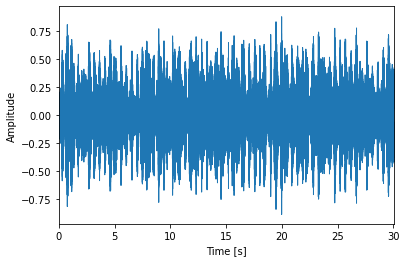

In [11]:
librosa.display.waveplot(signal, sr = sr)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

Transition from time to frequency domain

In [20]:
fft = np.fft.fft(signal) 
# fft - np array with complex values
print(len(fft))
# convert fft complex array to magnitudes
magnitude = np.abs(fft) # values
frequency = np.linspace(0, sr, len(magnitude))

# we don't need the whole plot (nyquist theorem)
# we only need the half - it's symmetrical
left_freq = frequency[:len(frequency)//2]
left_magn = magnitude[:len(magnitude)//2]


661794


Visualize the power spectrum

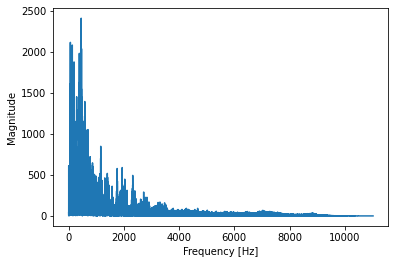

In [21]:
plt.plot(left_freq, left_magn)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.show()

Create a spectrogram

In [24]:
# Perform STFT
n_fft = 2048 # number of samples per FFT, time window to consider when performing a single FFT
hop_length = 512 # amount we are shifting each fourier transform to the right (slide the interval to the right)

stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)

spectrogram = np.abs(stft)

Visualize the spectrogram

[]

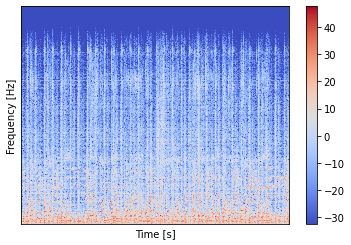

In [26]:
# calculate log spectrogram (use logarithmic scale)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length) # heatmap-like graph
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.colorbar()
plt.plot()


Extracting MFCCs

In [27]:
n_mfcc = 13 # number of coefficients to extract
MFCCs = librosa.feature.mfcc(signal, n_fft=n_fft, hop_length=hop_length, n_mfcc=n_mfcc)


Visualizing MFCCs

[]

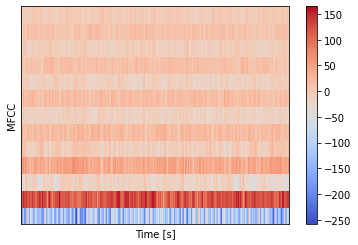

In [28]:
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length) # heatmap-like graph
plt.xlabel("Time [s]")
plt.ylabel("MFCC")
plt.colorbar()
plt.plot()